In [1]:
from keras.models import load_model
import pandas as pd
import numpy as np
from PIL import Image,ImageOps
import CharacterSegmentation as cs
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import cv2

In [2]:
INPUT_IMAGE = './input/inputx.jpg'
SEGMENTED_OUTPUT_DIR = './segmented/'

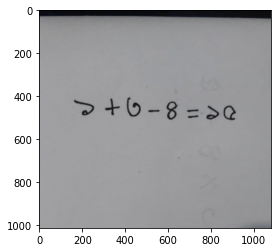

In [3]:
img = cv2.imread(INPUT_IMAGE)
#alpha= 0.5
#beta = 1
#new_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
#cv2.imwrite(INPUT_IMAGE, img)
plt.imshow(img)
dir = SEGMENTED_OUTPUT_DIR
for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

In [4]:
try:
    cs.image_segmentation(INPUT_IMAGE)
except:
    print("image may not be appropriate")


........Program Initiated.......


 Resizing Image........
#---------Image Info:--------#
	Height = 1239 
	Width = 1320
#----------------------------#
Applying Adaptive Threshold with kernel :- 21 X 21
Noise Removal From Image.........
Beginning Character Semenation..............

Given Text has   #  2  #   no. of lines

Average Width of Each Letter:-  181.72727272727272


In [5]:
segmented_images = []
images_name = []
image_int=[]
for (root,dirs,files) in os.walk(SEGMENTED_OUTPUT_DIR, topdown=True):
        images_name=files
for i in files:
    image_int.append(int(i[0:-4]))
image_int.sort()
for f in image_int:
    segmented_images.append(Image.open(SEGMENTED_OUTPUT_DIR +str(f)+'.jpg'))

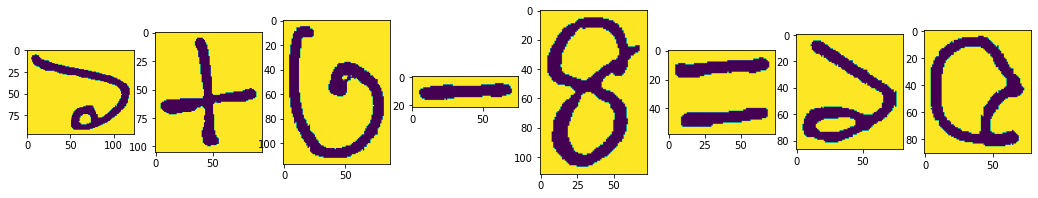

In [6]:
figure(figsize=(18,18))

size = len(segmented_images)
for i in range(size):
    img = segmented_images[i]
    plt.subplot(2, size, i + 1)
    plt.imshow(img)

./segmented/1.jpg


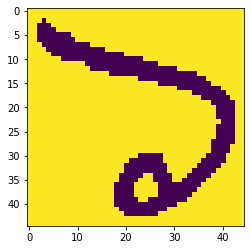

[1]
./segmented/2.jpg


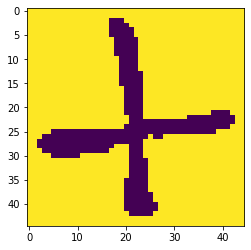

[10]
./segmented/3.jpg


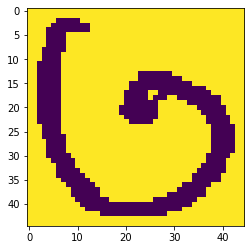

[3]
./segmented/4.jpg


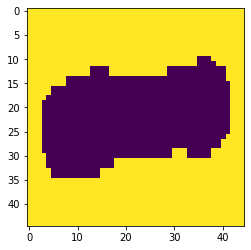

[5]
./segmented/5.jpg


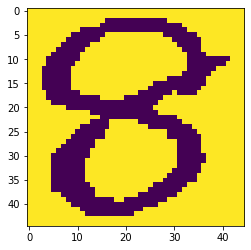

[4]
./segmented/6.jpg


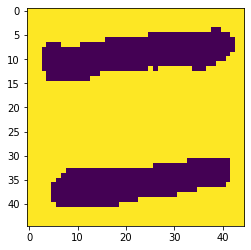

[1]
./segmented/7.jpg


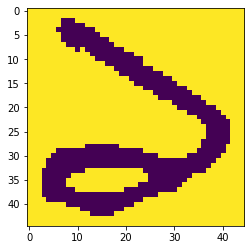

[1]
./segmented/8.jpg


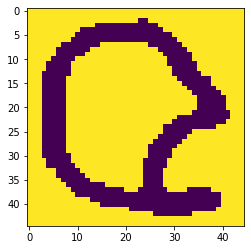

[5]
1+354115


In [7]:
def preprocessing(img):
    img=img.astype("uint8")
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY)
    img = img/255
    plt.imshow(img)
    plt.show()
    return img


def value(arr):
    classNo=arr[0]
    if classNo==0:
        return "0"
    elif classNo==1:
        return "1"
    elif classNo==2:
            return "2"
    elif classNo==3:
        return "3"
    elif classNo==4:
        return "4"
    elif classNo==5:
        return "5"
    elif classNo==6:
        return "6"
    elif classNo==7:
        return "7"
    elif classNo==8:
        return "8"
    elif classNo==9:
        return "9"
    elif classNo==10:
        return "+"
    elif classNo==11:
        return "-"
    elif classNo==12:
        return "/"
    elif classNo==13:
        return "*"
    elif classNo==14:
        return "="


model=load_model('BanglaModel_final_2.h5')
IMG_SIZE=45
expression =""
lst = os.listdir(SEGMENTED_OUTPUT_DIR)
for i in range(len(lst)):
    filename = SEGMENTED_OUTPUT_DIR +str(i+1)+'.jpg'
    print(filename)
    img=cv2.imread(filename)
    img=np.asarray(img)
    img=cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    img=preprocessing(img)
    img=img.reshape(1, IMG_SIZE, IMG_SIZE, 1)

    prediction=model.predict(img)
    classIndex=np.argmax(prediction,axis=1)
    print(classIndex)
    expression=expression + value(classIndex)

print(expression)
